<a href="https://colab.research.google.com/github/aswathyachuzz/diabetics_prediction/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

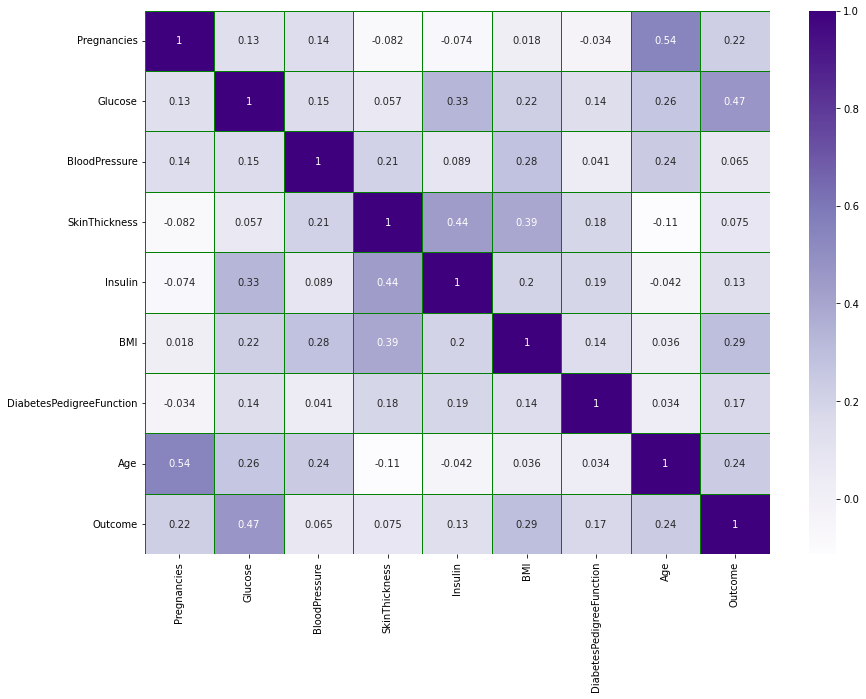

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='Purples',annot=True,linecolor='Green',linewidth=1.0)
plt.show()

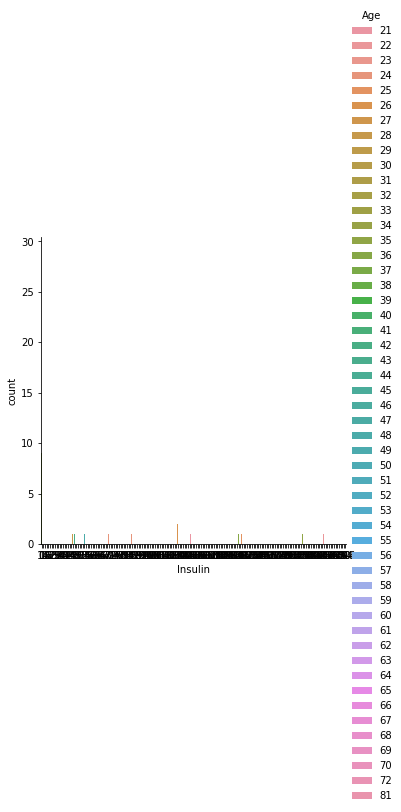

In [ ]:
sns.catplot(data=df,kind='count',x='Insulin',hue='Age')
plt.show()

In [ ]:
x=df.iloc[:,0:7]
y=df.iloc[:,8:9]
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)

C:\Users\aswathy stalin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [ ]:
y_pred=l.predict(x_test)
s=l.score(x_test,y_test)
s

0.796875

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cn=confusion_matrix(y_test,y_pred)
cn

array([[117,  13],
       [ 26,  36]], dtype=int64)

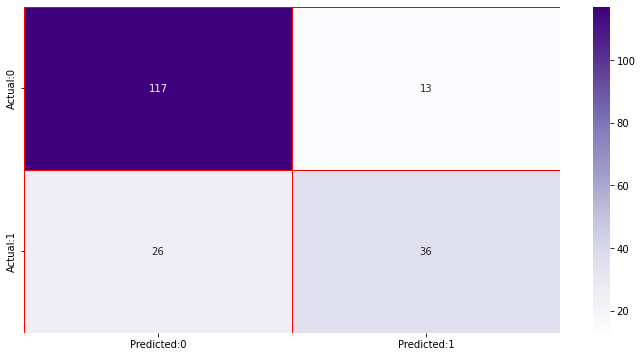

In [ ]:
con=pd.DataFrame(data=cn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True,fmt='d',cmap='Purples',linecolor='Red',linewidth=1.0)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cl=KNeighborsClassifier(n_neighbors=20,metric='minkowski',p=2)
cl.fit(x_train,y_train)

C:\Users\aswathy stalin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred1=cl.predict(x_test)
sc=cl.score(x_test,y_test)
sc


0.75

In [ ]:
cn1=confusion_matrix(y_test,y_pred1)
cn1

array([[117,  13],
       [ 35,  27]], dtype=int64)

conf=pd.DataFrame(data=cn1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(12,6))
sns.heatmap(conf,annot=True,fmt='d',cmap='Purples',linecolor='Red',linewidth=1.0)
plt.show()

In [ ]:
DESCISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(x_train,y_train)
y_pred2=dtree.predict(x_test)

In [ ]:
sc=dtree.score(x_test,y_test)
sc

0.7083333333333334

In [ ]:
cn=confusion_matrix(y_test,y_pred2)
cn

array([[95, 35],
       [21, 41]], dtype=int64)

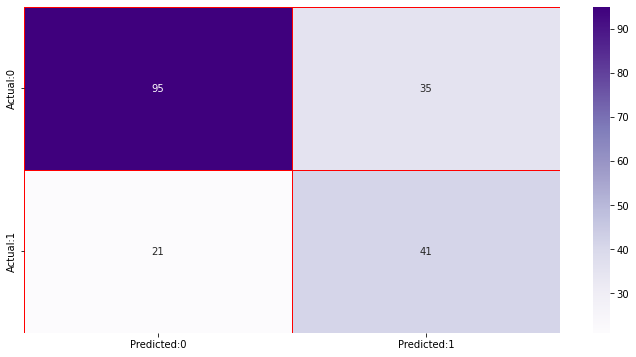

In [ ]:
con=pd.DataFrame(data=cn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True,fmt='d',cmap='Purples',linecolor='Red',linewidth=1.0)
plt.show()


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
tree=RandomForestClassifier(n_estimators=8,criterion='entropy')
tree.fit(x_train,y_train)

C:\Users\ASWATH~1\AppData\Local\Temp/ipykernel_17128/4191358759.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=8)

In [ ]:
y_pred3=tree.predict(x_test)
sc=tree.score(x_test,y_test)
sc

0.8125

In [ ]:
cn=confusion_matrix(y_test,y_pred3)
cn

array([[118,  12],
       [ 24,  38]], dtype=int64)

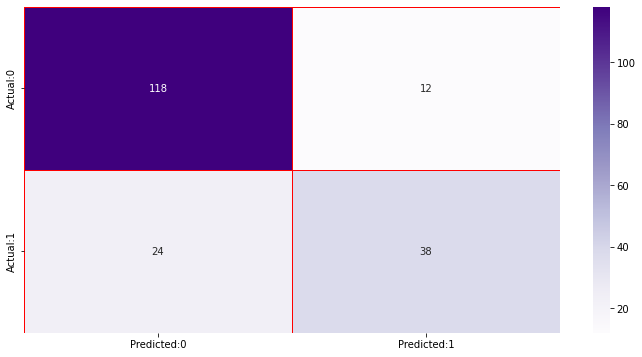

In [ ]:
con=pd.DataFrame(data=cn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True,fmt='d',cmap='Purples',linecolor='Red',linewidth=1.0)
plt.show()


SVM

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(x_train,y_train)

C:\Users\aswathy stalin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', random_state=0)

In [ ]:
y_pred4=sv.predict(x_test)
sc=tree.score(x_test,y_test)
sc

0.8125

In [ ]:
cn=confusion_matrix(y_test,y_pred4)
cn

array([[118,  12],
       [ 26,  36]], dtype=int64)

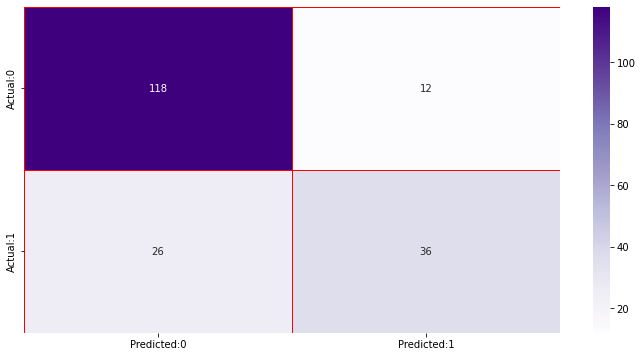

In [ ]:
con=pd.DataFrame(data=cn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True,fmt='d',cmap='Purples',linecolor='Red',linewidth=1.0)
plt.show()

K-Means Clustering

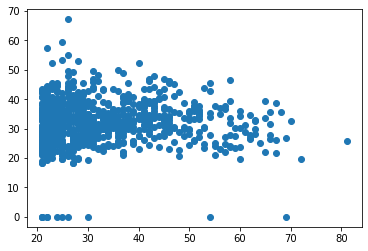

In [ ]:
plt.scatter(df['Age'],df['BMI'])

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_pred5=km.fit_predict(df[['Age','BMI']])
y_pred5

array([1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2,

In [ ]:
df['cluster']=y_pred5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluter,cluster
0,6,148,72,35,0,33.6,0.627,50,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2,2


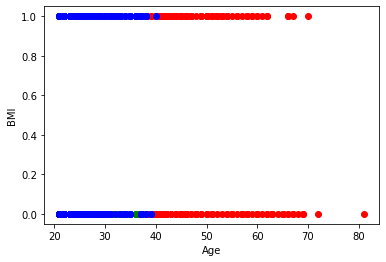

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


plt.scatter(df1.Age,df1['Outcome'],color='green')
plt.scatter(df2.Age,df2['Outcome'],color='red')
plt.scatter(df3.Age,df3['Outcome'],color='blue')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()



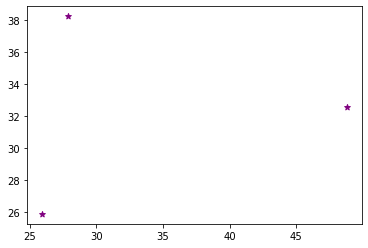

In [ ]:

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')